<a href="https://colab.research.google.com/github/rldckd0103/pdm02/blob/master/py-pandas/pandas_4_visualizing_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python module 3. **pandas**

# Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plt로 import
# %matplotlib inline  # work for Jupyter notebook or lab

In [2]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20200928', periods=6)  # 6일 동안의 index를 생성
dates

DatetimeIndex(['2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01',
               '2020-10-02', '2020-10-03'],
              dtype='datetime64[ns]', freq='D')

In [6]:
# head()
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('A''B''C''D'))  # 데이터 프레임을 만듬
df

,A,B,C,D
2020-09-28,0.471435,-1.190976,1.432707,-0.312652
2020-09-29,-0.720589,0.887163,0.859588,-0.636524
2020-09-30,0.015696,-2.242685,1.150036,0.991946
2020-10-01,0.953324,-2.021255,-0.334077,0.002118
2020-10-02,0.405453,0.289092,1.321158,-1.546906
2020-10-03,-0.202646,-0.655969,0.193421,0.553439




---



# 데이터 시각화

#### [도전] 데이터프레임 df의 평균(mean(0))과 표준편차를 이용한 그래프
- 평균에 대한 꺽은선그래프
- 평균과 표준편차를 이용한 막대그래프
> x-축은 A,B,C,D

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


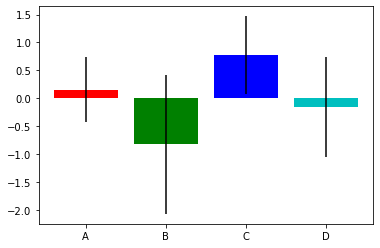

In [9]:
# df의 평균(mean(0))과 표준편차를 이용한 바그래프
bar_labels = df.columns
# plot bars
plt.bar(bar_labels, df.mean(0), yerr=df.std(0), color='rgbcy')
plt.show()  # 그래프만 보임.

***

## pandas의 데이터 시각화 (Visualization)

In [10]:
df

,A,B,C,D
2020-09-28,0.471435,-1.190976,1.432707,-0.312652
2020-09-29,-0.720589,0.887163,0.859588,-0.636524
2020-09-30,0.015696,-2.242685,1.150036,0.991946
2020-10-01,0.953324,-2.021255,-0.334077,0.002118
2020-10-02,0.405453,0.289092,1.321158,-1.546906
2020-10-03,-0.202646,-0.655969,0.193421,0.553439


### 꺽은선 그래프

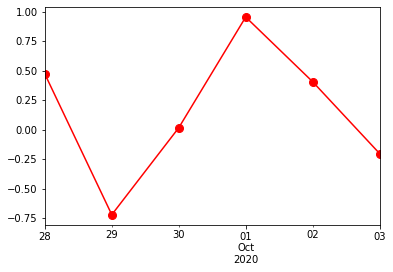

In [11]:
df['A'].plot(marker='o', c='r', ms=8) # A열. marker : 마커, c : 색상(red), 마커크기 : ms = 8

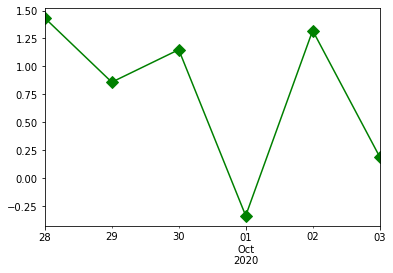

In [12]:
df['C'].plot(marker='D', c='g', ms=8) 

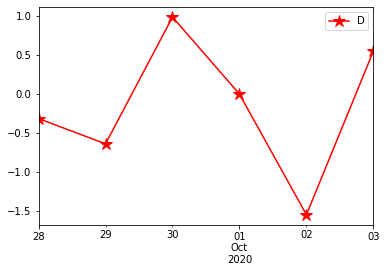

In [13]:
df.plot(y='D', marker='*', c='r', ms=12)  # 날짜에 따른 D의 값

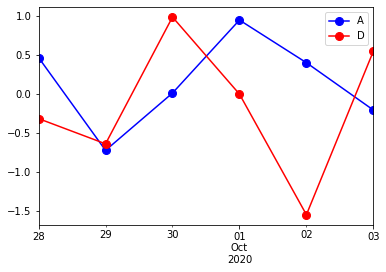

In [14]:
# 두 개의 그래프를 한 축에 그리기
# df['A','D'].plot(marker='o', c='r', ms=8) # 오류. 아래의 코드 참고
df[['A','D']].plot(marker='o', color='br', ms=8)  # works!, change colors
# 각각 다른 색으로 지정하고 싶으면 색을 각각 지정해줘야 됨.

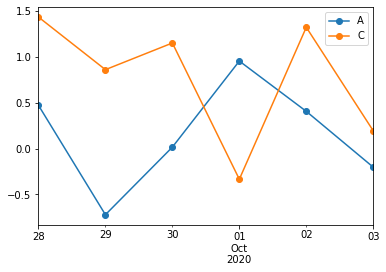

In [18]:
df.plot(y=['A','C'], marker='o')  

### 산포도 (Scatter graph)
-> 서로서로 어떤 식으로 관련되어서 분포하느냐

In [19]:
df

,A,B,C,D
2020-09-28,0.471435,-1.190976,1.432707,-0.312652
2020-09-29,-0.720589,0.887163,0.859588,-0.636524
2020-09-30,0.015696,-2.242685,1.150036,0.991946
2020-10-01,0.953324,-2.021255,-0.334077,0.002118
2020-10-02,0.405453,0.289092,1.321158,-1.546906
2020-10-03,-0.202646,-0.655969,0.193421,0.553439


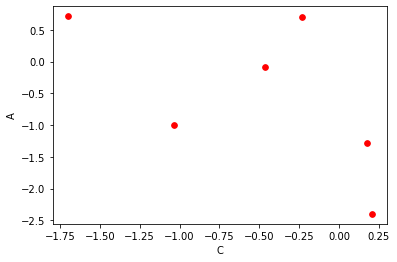

In [ ]:
df.plot(kind='scatter',x='C',y='A', color='r', marker='o', s=32) 

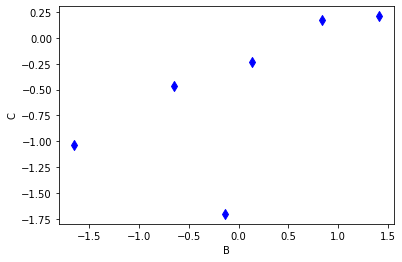

In [ ]:
df.plot(kind='scatter',x='B',y='C', color='blue', marker='d', s=50)  

### 바 그래프

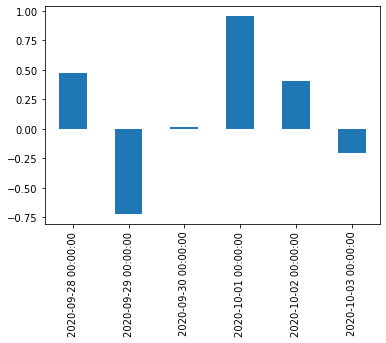

In [20]:
df['A'].plot.bar()

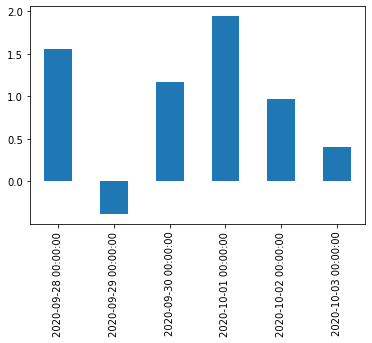

In [ ]:
df['D'].plot.bar()

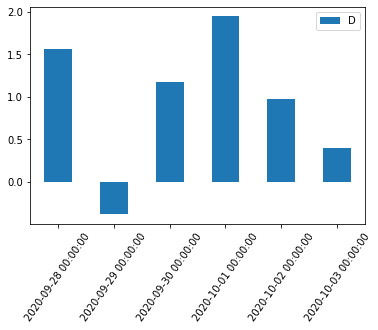

In [ ]:
df.plot(kind='bar', y='D', rot=55)

#### 다중 바그래프

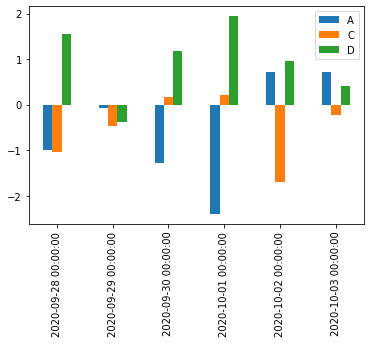

In [ ]:
df.plot(kind='bar',y=['A','C','D'])

#### 평균/표준편차 그래프

In [ ]:
df.mean(0), df.std(0), df.columns

(A   -0.556512
 B   -0.008731
 C   -0.508569
 D    0.942655
 dtype: float64, A    1.230270
 B    1.084712
 C    0.742977
 D    0.834748
 dtype: float64, Index(['A', 'B', 'C', 'D'], dtype='object'))

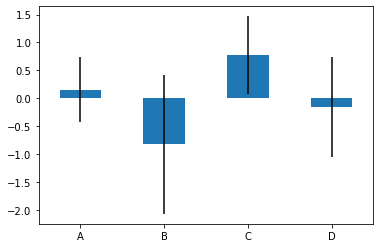

In [23]:
# plot bars
# bar_labels = df.columns
# plt.bar(bar_labels, df.mean(0), yerr=df.std(0))
df.mean().plot.bar(yerr=df.std(), rot=0) 

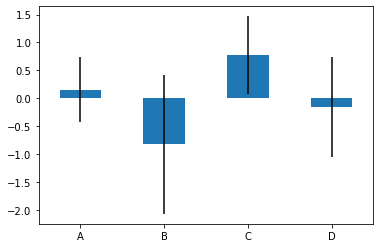

In [25]:
df.mean(0).plot.bar(yerr=df.std(0), rot=0) 



---



### 그래프 이어 그리기

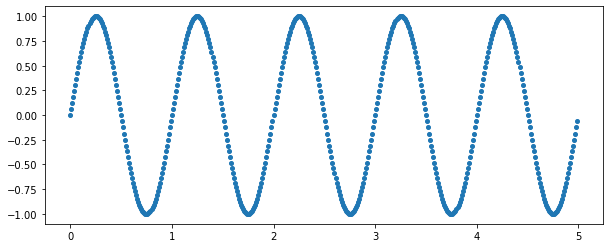

In [26]:
x1 = np.arange(0.0, 5.0, 0.01) 
y1 = np.sin(2*np.pi*x1) 
plt.figure(figsize=(10,4))  
plt.plot(x1, y1, 'o', ms = 4)

In [27]:
x1.shape, y1.shape 

((500,), (500,))

#### pandas 데이터프레임을 이용한 그래프 

In [28]:
df = pd.DataFrame(dict(sine=y1), index=x1, columns=['sine'])  
df.head()

,sine
0.00,0.000000
0.01,0.062791
0.02,0.125333
0.03,0.187381
0.04,0.248690


In [ ]:
df.tail()

,sine
4.95,-0.309017
4.96,-0.248690
4.97,-0.187381
4.98,-0.125333
4.99,-0.062791


In [29]:
len(df)

500

In [30]:
pre_size = int(len(df) * 0.8)
post_size = len(df) - pre_size
pre, post = df.iloc[0:pre_size], df.iloc[pre_size:len(df)]
print(len(pre), len(post))

400 100


In [31]:
post.shape 

(100, 1)

In [32]:
post2 = post + np.random.normal(scale=0.2, size=len(post)).reshape(-1,1)

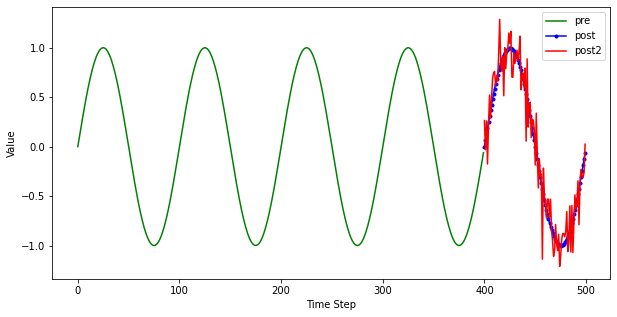

In [40]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0, len(pre)), pre, 'g', label="pre")
plt.plot(np.arange(len(pre), len(pre) + len(post)), post, 'b', marker='.', label="post")
plt.plot(np.arange(len(pre), len(pre) + len(post)), post2, 'r', label="post2")

plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

#### post  post2를 동시에 그려서 두 그래프를 비교해보시오. 

- subplot 사용
- 위, 아래로 그려서 비교

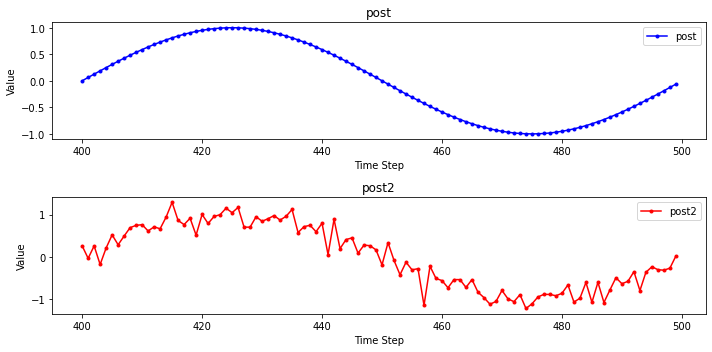

In [42]:
plt.figure(figsize=(10,5))

plt.subplot(211).set_title('post')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.plot(np.arange(len(pre), len(pre) + len(post)), post, 'b', marker='.', label="post")
plt.legend()

plt.subplot(212).set_title('post2')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.plot(np.arange(len(pre), len(pre) + len(post)), post2, 'r', label="post2")
plt.legend()

plt.tight_layout()
plt.show()